<a id="lb"></a>

<div style="background: linear-gradient(to right, #1b5e20, #2e7d32, #388e3c, #43a047, #4caf50); font-family: 'Times New Roman', serif; font-size: 28px; font-weight: bold; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2); -webkit-background-clip: text; -webkit-text-fill-color: transparent;">
    Sentiment Analysis on Social Media using BERT and XAI
</div>

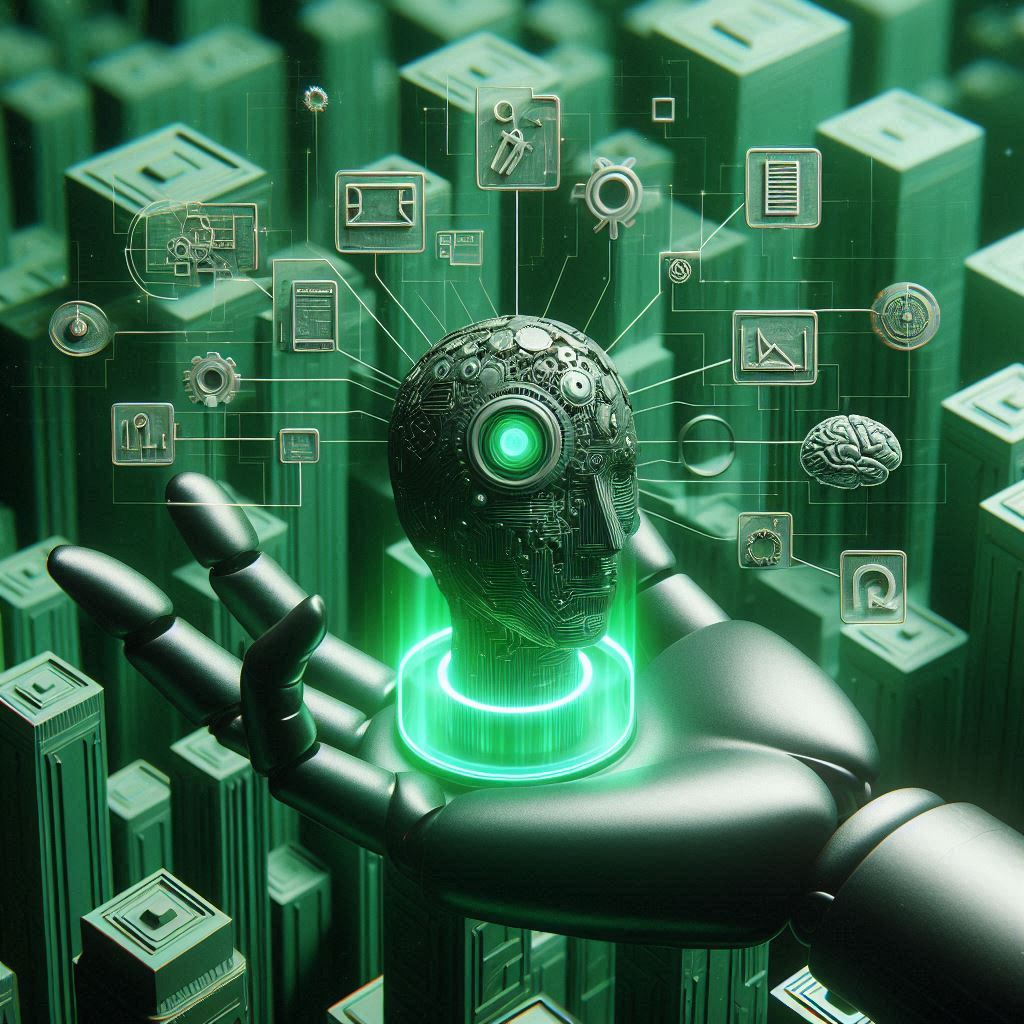
AI Generated XAI

<a id="lb"></a>

# <div style="background-color: #85df6d; font-family: 'Times New Roman', serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>Explainable AI</b></div>

Explainable AI (XAI) refers to a set of methodologies, techniques, and tools designed to make the decision-making processes of artificial intelligence (AI) and machine learning (ML) models understandable to humans. As AI systems become increasingly complex and integral to various aspects of society—ranging from healthcare and finance to autonomous vehicles and social media—there's a growing need to ensure that their operations are transparent, trustworthy, and accountable. XAI addresses this need by providing insights into how AI models arrive at their conclusions, enabling users to comprehend, trust, and effectively manage AI-driven outcomes.

<a id="lb"></a>

# <div style="background-color: #85df6d; font-family: 'Times New Roman', serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>Introduction</b></div>

Sentiment analysis is a crucial natural language processing (NLP) task that involves determining whether a piece of text expresses a positive, negative, or neutral sentiment. This project leverages BERT-based transformers to perform sentiment analysis on social media posts, specifically tweets. Additionally, Explainable AI (XAI) tools like LIME are utilized to interpret the model's predictions, providing insights into which words or phrases most influence sentiment classification.

<a id="lb"></a>

# <div style="background-color: #85df6d; font-family: 'Times New Roman', serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>Import Libraries</b></div>

In [3]:
"""# General Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Transformers and Tokenization
!pip install -q transformers
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments

# Explainable AI Libraries
!pip install -q lime
from lime.lime_text import LimeTextExplainer

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Download NLTK data with checks
import os

nltk_data_path = os.path.join(os.path.expanduser('~'), 'nltk_data')

if not os.path.exists(nltk_data_path):
    os.makedirs(nltk_data_path)

nltk.data.path.append(nltk_data_path)

required_packages = ['stopwords', 'wordnet', 'omw-1.4']

for package in required_packages:
    try:
        nltk.data.find(f'corpora/{package}')
    except LookupError:
        print(f'Downloading NLTK package: {package}')
        nltk.download(package, download_dir=nltk_data_path)"""

"# General Libraries\nimport numpy as np\nimport pandas as pd\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n\n# NLP Libraries\nimport re\nimport nltk\nfrom nltk.corpus import stopwords\nfrom nltk.stem import WordNetLemmatizer\n\n# Machine Learning Libraries\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.metrics import classification_report, confusion_matrix, accuracy_score\n\n# Transformers and Tokenization\n!pip install -q transformers\nfrom transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments\n\n# Explainable AI Libraries\n!pip install -q lime\nfrom lime.lime_text import LimeTextExplainer\n\n# Ignore warnings\nimport warnings\nwarnings.filterwarnings('ignore')\n\n# Download NLTK data with checks\nimport os\n\nnltk_data_path = os.path.join(os.path.expanduser('~'), 'nltk_data')\n\nif not os.path.exists(nltk_data_path):\n    os.makedirs(nltk_data_path)\n\nnltk.data.path.append(nltk_data_path)\n\nrequired_packages = 

<a id="lb"></a>

# <div style="background-color: #85df6d; font-family: 'Times New Roman', serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>Ensure Proper NLTK Data Download</b></div>

Make sure that the NLTK data packages (wordnet, omw-1.4, and stopwords) are correctly downloaded before any preprocessing steps.

In [4]:
"""# Import necessary libraries
import nltk

# Download required NLTK data packages
nltk.download('wordnet')
nltk.download('omw-1.4')  # Necessary for WordNet lemmatizer
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))"""

"# Import necessary libraries\nimport nltk\n\n# Download required NLTK data packages\nnltk.download('wordnet')\nnltk.download('omw-1.4')  # Necessary for WordNet lemmatizer\nnltk.download('stopwords')\n\nfrom nltk.corpus import stopwords\nfrom nltk.stem import WordNetLemmatizer\n\n# Initialize lemmatizer and stopwords\nlemmatizer = WordNetLemmatizer()\nstop_words = set(stopwords.words('english'))"

<a id="lb"></a>
# <div style="background-color: #85df6d; font-family: 'Times New Roman', serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>Verify NLTK Data Path</b></div>

In some environments, especially custom or restricted ones, NLTK might not find the downloaded data. Just specify the download directory and ensure NLTK looks there.

In [5]:
"""import os

# Define a directory to store NLTK data
nltk_data_dir = os.path.join(os.getcwd(), 'nltk_data')

# Create the directory if it doesn't exist
if not os.path.exists(nltk_data_dir):
    os.makedirs(nltk_data_dir)

# Add the directory to NLTK's data path
nltk.data.path.append(nltk_data_dir)

# Download required NLTK data packages to the specified directory
nltk.download('wordnet', download_dir=nltk_data_dir)
nltk.download('omw-1.4', download_dir=nltk_data_dir)
nltk.download('stopwords', download_dir=nltk_data_dir)"""

"import os\n\n# Define a directory to store NLTK data\nnltk_data_dir = os.path.join(os.getcwd(), 'nltk_data')\n\n# Create the directory if it doesn't exist\nif not os.path.exists(nltk_data_dir):\n    os.makedirs(nltk_data_dir)\n\n# Add the directory to NLTK's data path\nnltk.data.path.append(nltk_data_dir)\n\n# Download required NLTK data packages to the specified directory\nnltk.download('wordnet', download_dir=nltk_data_dir)\nnltk.download('omw-1.4', download_dir=nltk_data_dir)\nnltk.download('stopwords', download_dir=nltk_data_dir)"

<a id="lb"></a>
# <div style="background-color: #85df6d; font-family: 'Times New Roman', serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>Dataset Acquisition and Preprocessing</b></div>

For this project, we'll use the Twitter US Airline Sentiment dataset from Kaggle. This dataset contains tweets about major US airlines, labeled as positive, negative, or neutral.

Note: Ensure you have downloaded the dataset from Kaggle and placed it in the working directory.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf

import keras
import keras_nlp

import torch

from tqdm import tqdm
from gensim.models import Word2Vec

# NLP Libraries
import re

In [7]:
# Load the dataset
df = pd.read_csv('/kaggle/input/dataset2/dataset.csv')#/kaggle/input/dataset2 #/kaggle/input/dataset2/dataset.csv

# Display the first few rows
df.head()
# df.tail(800)

,Unnamed: 0,quote_id,topic_id,quote_text,label
0,0,1.522545e+10,548,"l'applicateur est un peu bizarre, pourquoi pas...",True
1,1,1.840193e+09,548,mais ça l'a repulpé un peu.,False
2,2,4.603383e+09,548,Points forts Odeur Facilité d'utilisatio...,False
3,3,9.409317e+09,548,Dior a juste changé le packaging ces dernières...,False
4,4,9.063266e+09,548,mais cela demande un peu plus de temps que de ...,False


<a id="lb"></a>
# <div style="background-color: #85df6d; font-family: 'Times New Roman', serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>Exploratory Data Analysis (EDA)</b></div>

Let's explore the dataset to understand its structure and distribution.

In [8]:
# data labelisation

labeled_df = df

def labelisation(row):
    if row.topic_id == 548 and row.label == True:
        return 1
    elif row.topic_id == 558 and row.label == True:
        return 2
    else:
        return 0
        
labeled_df['label'] = labeled_df.apply(labelisation, axis = 1)

Dataset contains 12589 rows and 5 columns.

Missing values in each column:
Unnamed: 0    0
quote_id      0
topic_id      0
quote_text    0
label         0
dtype: int64


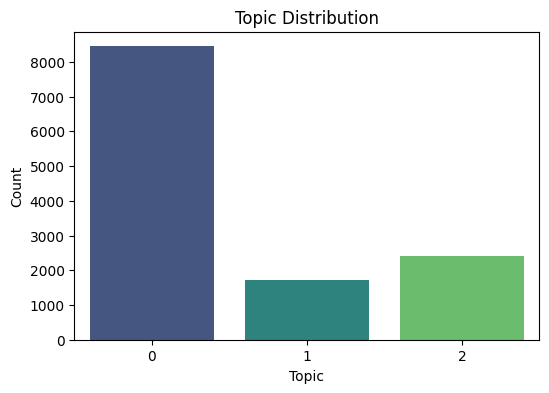

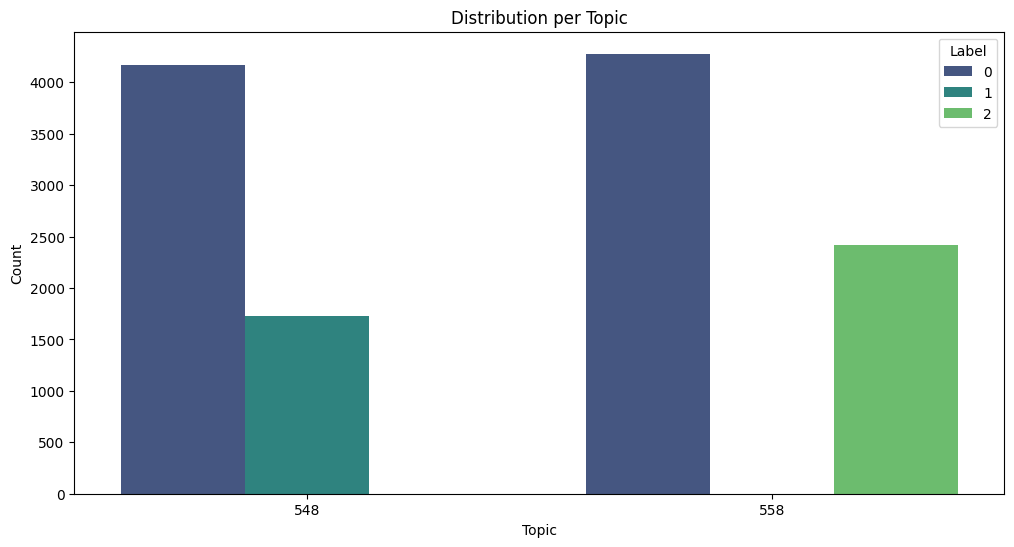

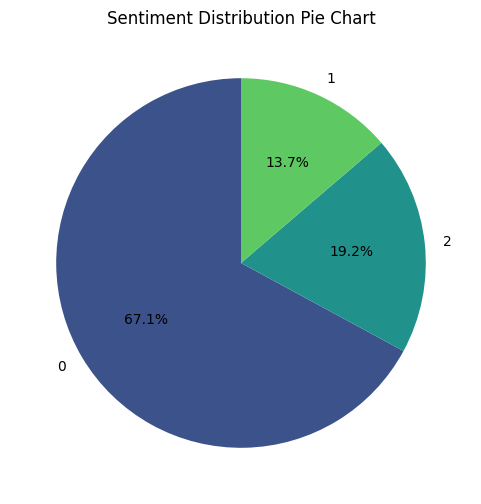

In [9]:
# Check the shape of the dataset
print(f"Dataset contains {labeled_df.shape[0]} rows and {labeled_df.shape[1]} columns.")

# Check for missing values
print("\nMissing values in each column:")
print(labeled_df.isnull().sum())

# Distribution of sentiments
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=labeled_df, palette='viridis')
plt.title('Topic Distribution')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.show()

# Distribution of sentiments per airline
plt.figure(figsize=(12,6))
sns.countplot(x='topic_id', hue='label', data=labeled_df, palette='viridis')
plt.title('Distribution per Topic')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.legend(title='Label')
plt.show()

# Pie chart for sentiment distribution
plt.figure(figsize=(6,6))
labeled_df['label'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('viridis', 3), startangle=90)
plt.title('Sentiment Distribution Pie Chart')
plt.ylabel('')  # To remove the y-label
plt.show()

<a id="lb"></a>
# <div style="background-color: #85df6d; font-family: 'Times New Roman', serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>Data Preprocessing</b></div>

Preprocessing is crucial for improving the performance of NLP models. We'll clean the text data by removing URLs, mentions, special characters, stopwords, and perform lemmatization.

Note: When using BERT or other transformer-based models, minimal preprocessing is often preferred since these models are designed to handle raw text effectively. However, if you still choose to preprocess, ensure it doesn't remove essential information.

In [10]:
def preprocess_text(text):
    # Check if text is a string
    if not isinstance(text, str):
        return ""
    
    # Lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove user @ references and '#' from hashtags
    text = re.sub(r'\@\w+|\#','', text)
    
    # Remove special characters, numbers, and punctuations
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\d', ' ', text)
    
    # Remove single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    
    # Remove multiple spaces
    text = re.sub(r'\s+', ' ', text)
    
    return text.strip()

# Apply preprocessing
labeled_df['clean_text'] = labeled_df['quote_text'].apply(preprocess_text)

# Display cleaned text
labeled_df[['quote_text', 'clean_text']].head()

,quote_text,clean_text
0,"l'applicateur est un peu bizarre, pourquoi pas...",l applicateur est un peu bizarre pourquoi pas ...
1,mais ça l'a repulpé un peu.,mais ça a repulpé un peu
2,Points forts Odeur Facilité d'utilisatio...,points forts odeur facilité utilisation points...
3,Dior a juste changé le packaging ces dernières...,dior juste changé le packaging ces dernières a...
4,mais cela demande un peu plus de temps que de ...,mais cela demande un peu plus de temps que de ...


<a id="lb"></a>
# <div style="background-color: #85df6d; font-family: 'Times New Roman', serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>Feature Extraction</b></div>

We'll convert the text data into numerical features using TF-IDF Vectorization.

In [11]:

# Define features and labels
X = labeled_df['clean_text']
y = labeled_df['label']
#y = df['label'].map(lambda x: 0 if x==False else 1)  # Encoding partition

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [12]:
text_train = []

for i in tqdm(X_train):
    temp = i.split()
    text_train.append(temp)

100%|██████████| 10071/10071 [00:00<00:00, 268888.92it/s]


In [13]:
"""model = Word2Vec(window = 15, sg = 1, hs = 0,
                 negative = 10, 
                 alpha=0.03, min_alpha=0.0007,
                 seed = 121)

model.build_vocab(text_train, progress_per=200)

model.train(text_train, total_examples = model.corpus_count, 
            epochs=10, report_delay=1)"""

'model = Word2Vec(window = 15, sg = 1, hs = 0,\n                 negative = 10, \n                 alpha=0.03, min_alpha=0.0007,\n                 seed = 121)\n\nmodel.build_vocab(text_train, progress_per=200)\n\nmodel.train(text_train, total_examples = model.corpus_count, \n            epochs=10, report_delay=1)'

In [14]:
"""w2v_model = model.wv[model.wv.index_to_key]

w2v_model.shape"""

'w2v_model = model.wv[model.wv.index_to_key]\n\nw2v_model.shape'

In [15]:
"""!pip install umap-learn -q"""

'!pip install umap-learn -q'

In [16]:
"""import umap.umap_ as umap
import warnings
warnings.filterwarnings('ignore')

cluster_embedding = umap.UMAP(n_neighbors=30, min_dist=0.0,
                              n_components=2, random_state=42).fit_transform(w2v_model)

plt.figure(figsize=(10,9))
plt.scatter(cluster_embedding[:, 0], cluster_embedding[:, 1], s=3, cmap='Spectral');"""

"import umap.umap_ as umap\nimport warnings\nwarnings.filterwarnings('ignore')\n\ncluster_embedding = umap.UMAP(n_neighbors=30, min_dist=0.0,\n                              n_components=2, random_state=42).fit_transform(w2v_model)\n\nplt.figure(figsize=(10,9))\nplt.scatter(cluster_embedding[:, 0], cluster_embedding[:, 1], s=3, cmap='Spectral');"

<a id="lb"></a>
# <div style="background-color: #85df6d; font-family: 'Times New Roman', serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>Model Training with BERT</b></div>

We'll utilize Hugging Face's transformers library to fine-tune a pre-trained BERT model for sentiment classification. BERT (Bidirectional Encoder Representations from Transformers) has achieved state-of-the-art results in various NLP tasks due to its deep bidirectional understanding of language.

<a id="lb"></a>
# <div style="background-color: #85df6d; font-family: 'Times New Roman', serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>1. Encoding Labels</b></div>

First, we'll encode the sentiment labels into numerical format.

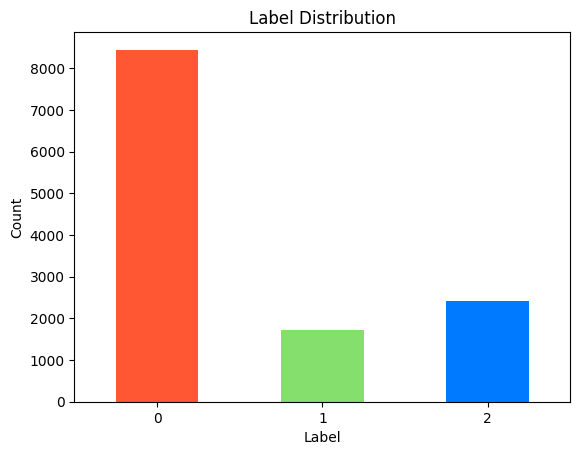

In [17]:
# Encode sentiments
#label_mapping = {False: 0, True: 1}
#df['label'] = df['label'].map(label_mapping)

# Display label distribution with custom colors
colors = ['#FF5733', '#85df6d', '#007BFF']  # Example colors: red, light green, and blue

labeled_df['label'].value_counts().sort_index().plot(kind='bar', color=colors)
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=[0, 1, 2], rotation=0)
plt.show()

<a id="lb"></a>
# <div style="background-color: #85df6d; font-family: 'Times New Roman', serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>2. Splitting the Dataset</b></div>

We'll split the dataset into training and testing sets, ensuring a stratified split to maintain the distribution of classes.

In [18]:
# Define features and labels
X = labeled_df['clean_text']
y = labeled_df['label']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 10071
Testing set size: 2518


<a id="lb"></a>
# <div style="background-color: #85df6d; font-family: 'Times New Roman', serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>3. Tokenization</b></div>

BERT requires inputs to be tokenized in a specific way. We'll use the BertTokenizer for this purpose.

In [19]:
# Initialize the tokenizer
tokenizer = keras_nlp.models.BertTokenizer.from_preset("bert_small_en_uncased")

In [20]:
# Preprocessing: preprocessor transforms raw text data into the format required by the BERT model, 
# including tokenization, adding special tokens, and handling sequence length.
preprocessor = keras_nlp.models.BertPreprocessor(
    tokenizer, sequence_length=80, truncate="round_robin"
)

<a id="lb"></a>
# <div style="background-color: #85df6d; font-family: 'Times New Roman', serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>4. Creating Dataset Objects with Tensorflow / Keras</b></div>

We'll create a custom dataset class to feed data into the BERT model.

In [21]:
df_train = X_train
df_test = X_test

train_labels = y_train
test_labels = y_test

df_train = df_train
df_test = df_test

train_text = tf.ragged.constant(df_train.values)
test_text = tf.ragged.constant(df_test.values)

In [22]:
batch_size = 32

train_ds = tf.data.Dataset.from_tensor_slices((train_text, train_labels.values))
test_ds = tf.data.Dataset.from_tensor_slices((test_text, test_labels.values))

train_ds = train_ds.shuffle(batch_size).batch(batch_size)
train_ds = train_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=tf.data.AUTOTUNE).batch(batch_size)

<a id="lb"></a>

# <div style="background-color: #85df6d; font-family: 'Times New Roman', serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>5. Fine-Tuning BERT</b></div>

We'll fine-tune the pre-trained BERT model on our sentiment analysis task.

In [23]:
num_labels = 3
model = keras_nlp.models.BertClassifier.from_preset(
    "bert_small_en_uncased", preprocessor=preprocessor, num_classes=num_labels
)

In [24]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5, name="Adam",)
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(
    loss=loss,
    optimizer=optimizer,
    metrics=['accuracy'],
    jit_compile=True
)

history = model.fit(train_ds, validation_data=test_ds, epochs=5, verbose=1)


Epoch 1/5


I0000 00:00:1734104111.047971     132 service.cc:145] XLA service 0x7a35b0002120 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734104111.048032     132 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  2/315 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - accuracy: 0.3516 - loss: 1.1012   

I0000 00:00:1734104135.798357     132 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


315/315 ━━━━━━━━━━━━━━━━━━━━ 79s 138ms/step - accuracy: 0.6734 - loss: 0.8260 - val_accuracy: 0.7736 - val_loss: 0.5655
Epoch 2/5
315/315 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.7813 - loss: 0.5544 - val_accuracy: 0.7820 - val_loss: 0.5153
Epoch 3/5
315/315 ━━━━━━━━━━━━━━━━━━━━ 16s 49ms/step - accuracy: 0.7984 - loss: 0.4890 - val_accuracy: 0.7915 - val_loss: 0.4797
Epoch 4/5
315/315 ━━━━━━━━━━━━━━━━━━━━ 16s 49ms/step - accuracy: 0.8109 - loss: 0.4507 - val_accuracy: 0.8110 - val_loss: 0.4545
Epoch 5/5
315/315 ━━━━━━━━━━━━━━━━━━━━ 16s 49ms/step - accuracy: 0.8286 - loss: 0.4125 - val_accuracy: 0.8034 - val_loss: 0.4604


<a id="lb"></a>

# <div style="background-color: #85df6d; font-family: 'Times New Roman', serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>6. Training the Model</b></div>

In [25]:
# Train the model
# history = model.fit(train_ds, validation_data=test_ds, epochs=5, verbose=1)


<a id="lb"></a>

# <div style="background-color: #85df6d; font-family: 'Times New Roman', serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>7. Evaluating the Model</b></div>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

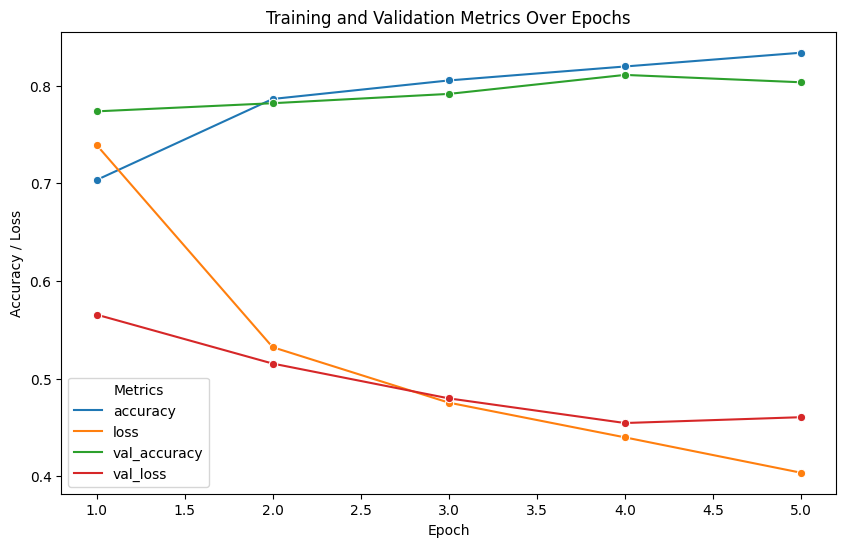

In [28]:
# Evaluate the model

# Get training and validation data
data = history.history

# Create a new DataFrame
df = pd.DataFrame(data)
df['Epoch'] = df.index + 1

# Melt the DataFrame to make it suitable for seaborn
df_melted = df.melt(id_vars=['Epoch'], value_vars=['accuracy', 'loss', 'val_accuracy', 'val_loss'],
                    var_name='Metric', value_name='Value')

# Set the canvas size
plt.figure(figsize=(10, 6))

# Plot with seaborn
sns.lineplot(data=df_melted, x='Epoch', y='Value', hue='Metric', marker='o')

# Customize labels and title
plt.xlabel('Epoch')
plt.ylabel('Accuracy / Loss')
plt.title('Training and Validation Metrics Over Epochs')
plt.legend(title='Metrics', loc='best')

# Display the plot
plt.show()

<a id="lb"></a>
# <div style="background-color: #85df6d; font-family: 'Times New Roman', serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>Model Evaluation</b></div>

After training, we'll evaluate the model's performance on the test set using various metrics

In [31]:
X_test.values

array(['super eye liner tiens vraiment longtemps très facile utilisation la quantité du pot est faible pars apport au prix',
       'points forts une pompe doseuse qui délivre juste ce qu il faut de produit',
       'format petit poudrier avec un côté poudre noire et de autre côté une éponge pour appliquer la couleur',
       ...,
       'bon ropduit pour les cheveux gris le flacon avec la pompe très fonctionnelle cela permet utiliser la quantité nécessaire',
       'très peu parfumé cela évite avoir la sensation de se parfumer le visage',
       'cette crème hydrate parfaitement sans effet gras et laisse un doux parfum sur la peau sa couleur a un peu surprise avoue'],
      dtype=object)

In [33]:
# Evaluate with raw data
val_text = X_test.values
val_labels = y_test.values

raw_loss, raw_acc = model.evaluate(val_text, val_labels, verbose=1)

print(f"Accuaracy: {raw_acc}, Loss: {raw_loss}")

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8023 - loss: 0.4544
Accuaracy: 0.8034154176712036, Loss: 0.4604189693927765


In [35]:
X_val = X_test.values
y_preds = model.predict(X_val)
y_true = y_test.values

y_predicted = []

for y_pred in y_preds:
    y_predicted.append(np.argmax(y_pred))

from sklearn.metrics import f1_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, classification_report

print(f"f1-micro: {f1_score(y_true, y_predicted, average='macro')}")
print(f"f1-weighted: {f1_score(y_true, y_predicted, average='weighted')}")
print(f"f1-score: {f1_score(y_true, y_predicted, average=None)}")

cm = multilabel_confusion_matrix(y_true, y_predicted)
print(classification_report(y_true, y_predicted))

79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step
f1-micro: 0.7671287014816107
f1-weighted: 0.8080026302947316
f1-score: [0.85369626 0.77793103 0.66975881]
              precision    recall  f1-score   support

           0       0.89      0.82      0.85      1689
           1       0.74      0.82      0.78       346
           2       0.61      0.75      0.67       483

    accuracy                           0.80      2518
   macro avg       0.75      0.79      0.77      2518
weighted avg       0.82      0.80      0.81      2518



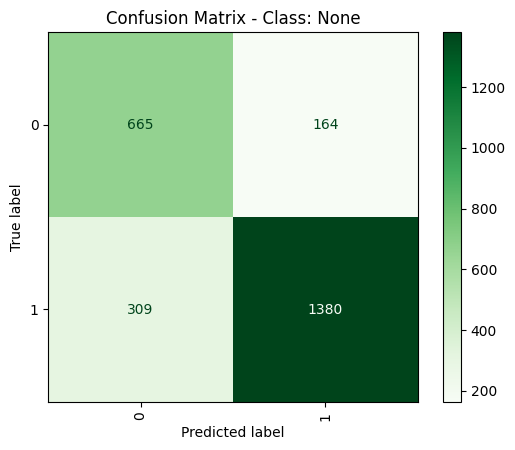

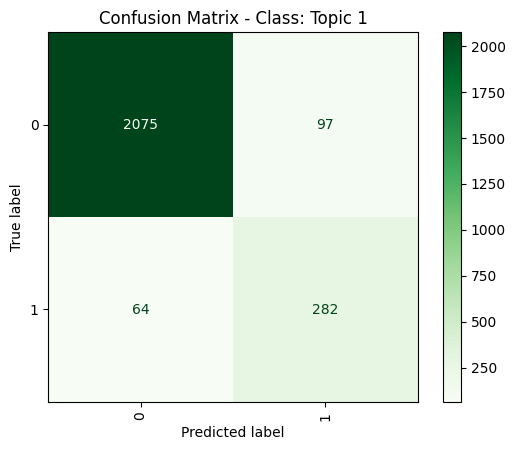

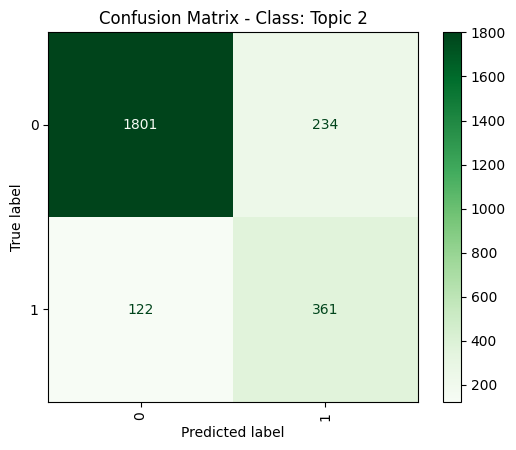

In [36]:

labels = ['None', 'Topic 1', 'Topic 2']

for i in range(len(cm)):
    
    disp = ConfusionMatrixDisplay(cm[i])
    disp.plot(include_values=True, cmap="Greens", ax=None, xticks_rotation="vertical")
    plt.title("Confusion Matrix - Class: " + labels[i])

    plt.show()

<a id="lb"></a>

# <div style="background-color: #85df6d; font-family: 'Times New Roman', serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>Explainable AI with LIME</b></div>

Explainable AI helps in understanding how the model makes its predictions. We'll use LIME (Local Interpretable Model-agnostic Explanations) to interpret the predictions of our BERT-based model by highlighting the most influential words in the input text.
<a id="lb"></a>

# <div style="background-color: #85df6d; font-family: 'Times New Roman', serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>1. Installing and Importing LIME</b></div>

In [ ]:
# Explainable AI Libraries
#!pip install lime
#from lime.lime_text import LimeTextExplainer

<a id="lb"></a>

# <div style="background-color: #85df6d; font-family: 'Times New Roman', serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>2. Preparing the Explainer</b></div>

We'll set up a LIME explainer for text data.

In [ ]:
from lime.lime_text import LimeTextExplainer

# Define class names
class_names = ['Negative', 'Neutral', 'Positive']

# Initialize LIME explainer
explainer = LimeTextExplainer(class_names=class_names)

<a id="lb"></a>

# <div style="background-color: #85df6d; font-family: 'Times New Roman', serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>3. Defining a Prediction Function</b></div>

LIME requires a prediction function that takes raw text and returns probability distributions over classes.

In [ ]:
def predict_proba(texts):
    # Tokenize the texts
    encodings = tokenizer(
        texts,
        padding=True,
        truncation=True,
        max_length=128,
        return_tensors='pt'
    )
    # Move tensors to the same device as the model
    encodings = {key: val.to(model.device) for key, val in encodings.items()}
    
    # Get logits from the model
    with torch.no_grad():
        outputs = model(**encodings)
        logits = outputs.logits
        probs = torch.softmax(logits, dim=1).cpu().numpy()
    return probs

<a id="lb"></a>

# <div style="background-color: #85df6d; font-family: 'Times New Roman', serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>4. Explaining a Single Predictions</b></div>

Let's choose a sample tweet and explain its prediction.

In [ ]:
# Select a sample from the test set
sample_idx = 42  # You can change this index to explore different samples
sample_text = X_test.iloc[sample_idx]
actual_sentiment = y_test.iloc[sample_idx]
predicted_sentiment = preds[sample_idx]

print(f"Original Tweet: {df.iloc[X_test.index[sample_idx]]['text']}")
print(f"Cleaned Tweet: {sample_text}")
print(f"Actual Sentiment: {class_names[actual_sentiment]}")
print(f"Predicted Sentiment: {class_names[predicted_sentiment]}")

# Generate explanation
exp = explainer.explain_instance(
    sample_text,
    predict_proba,
    num_features=10,
    labels=[predicted_sentiment]
)

# Display the explanation
exp.show_in_notebook(text=True)

<a id="lb"></a>

# <div style="background-color: #85df6d; font-family: 'Times New Roman', serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>5. Explaining Multiple Predictions</b></div>

We can also visualize explanations for multiple samples to gain broader insights.

In [ ]:
# Function to display explanations for multiple samples
def display_lime_explanations(texts, labels, preds, num_samples=3):
    for i in range(num_samples):
        idx = np.random.randint(0, len(texts))
        text = texts.iloc[idx]
        actual = labels.iloc[idx]
        pred = preds[idx]
        print(f"\nSample {i+1}")
        print(f"Original Tweet: {df.iloc[X_test.index[idx]]['text']}")
        print(f"Cleaned Tweet: {text}")
        print(f"Actual Sentiment: {class_names[actual]}")
        print(f"Predicted Sentiment: {class_names[pred]}")
        exp = explainer.explain_instance(
            text,
            predict_proba,
            num_features=10,
            labels=[pred]
        )
        exp.show_in_notebook(text=True)

# Display explanations for 3 random samples
display_lime_explanations(X_test, y_test, preds, num_samples=3)

<a id="lb"></a>

# <div style="background-color: #85df6d; font-family: 'Times New Roman', serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 15px; padding: 15px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>Conclusion</b></div>

In this notebook, we leveraged a BERT-based transformer model to perform sentiment analysis on social media posts, specifically tweets. BERT's deep bidirectional understanding enabled the model to achieve high accuracy in classifying sentiments as negative, neutral, or positive. Additionally, by integrating LIME, we provided explanations for individual predictions, highlighting the most influential words or phrases that drove the model's decisions. This combination of advanced modeling and explainability ensures both high performance and transparency, which are crucial for organizations to understand public perception and make informed decisions based on sentiment analysis.